In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

%matplotlib inline



In [35]:
print("Current Working Directory " , os.getcwd())
os.chdir(r"C:\Users\mariand\OneDrive\Courses\Python\LearnPython")
df3 = pd.read_csv("data/cars_data_df3.csv")
df3.head(3)

df2 = pd.read_csv("./data/cars_data_df2.csv")



Current Working Directory  C:\Users\mariand\OneDrive\Courses\Python\LearnPython


## group by


In [36]:
df_test = df3[["drive-wheels", "body-style", "price"]]
df_grouped = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()
# help(pd.groupby)
df_grouped.sort_values(by=["price"])

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
4,fwd,hatchback,7989.800000
3,fwd,hardtop,8249.000000
6,fwd,wagon,8829.222222
2,4wd,wagon,9095.750000
5,fwd,sedan,9538.509804
1,4wd,sedan,12647.333333
8,rwd,hardtop,14365.750000
9,rwd,hatchback,14918.500000
10,rwd,sedan,18318.576923


## create a pivot table

In [37]:
# help(pd.pivot)
df_pivot = df_grouped.pivot(index = "drive-wheels", columns="body-style")
df_pivot

price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  NaN       NaN    7603.0  12647.333333   9095.750000
fwd                  NaN   8249.00    7989.8   9538.509804   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000

## heat map


C:\Program Files\Microsoft\ML Server\PYTHON_SERVER\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


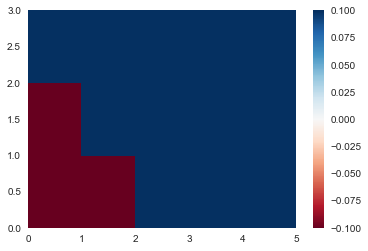

In [38]:
plt.pcolor(df_pivot, cmap = "RdBu")
plt.colorbar()
plt.show()



## analysis of variance (ANOVA)

In [39]:

# extract the make and price data
df_anova = df3[["make", "price"]]
df_anova.head(3)
grouped_anova = df_anova.groupby(["make"])
anova_results_1 = scipy.stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])

anova_results_1






F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

## correlation

(0, 41256.904258299066)

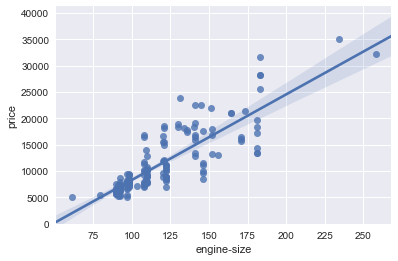

In [40]:
sns.regplot(x="engine-size", y="price", data=df3)
plt.ylim(0,)

(0, 37208.650134530202)

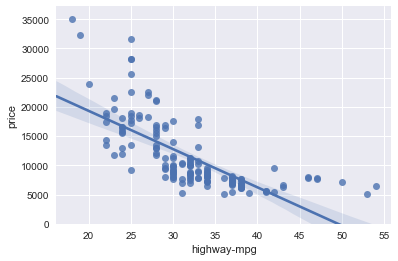

In [41]:
sns.regplot(x="highway-mpg", y="price", data=df3)
plt.ylim(0,)

(0, 36588.934815490975)

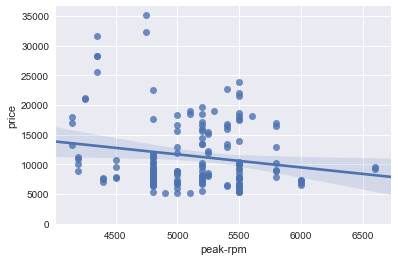

In [42]:
sns.regplot(x="peak-rpm", y="price", data=df3)
plt.ylim(0,)

## Pearson correlation

In [43]:
pearson_coef, p_value = stats.pearsonr(df3["horsepower"], df3["price"])
print(pearson_coef)
print(p_value)

nan
1.0


C:\Program Files\Microsoft\ML Server\PYTHON_SERVER\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
